In [2]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
# read in csv as dataframe
df = pd.read_csv('https://mydataclassdb-bucket.s3.amazonaws.com/covid_and_politics_db.csv')
df.head()

,county,state,county_state,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
0,Kay,OK,"Kay, OK",36.817997,-97.144214,45173,17249,12834,4040,0.744,...,5694,4632,2724,1183,0,0,0,0,0,0
1,Abbeville,SC,"Abbeville, SC",34.223334,-82.461707,24788,12433,8215,4101,0.661,...,3584,3150,1602,591,0,0,0,0,0,0
2,Acadia,LA,"Acadia, LA",30.295065,-92.414197,62607,28425,22596,5443,0.795,...,0,0,0,0,0,0,0,0,0,0
3,Accomack,VA,"Accomack, VA",37.767072,-75.632346,32840,16938,9172,7578,0.542,...,5270,4451,2301,886,0,0,0,0,0,0
4,Ada,ID,"Ada, ID",43.452658,-116.241552,435117,259389,130699,120539,0.504,...,56615,42027,18576,7189,0,0,0,0,0,0


In [4]:
# drop rows with null values and check if there are any nulls in columns after
df = df.dropna(axis = 0, how = 'any')
df.isnull().sum()

county          0
state           0
county_state    0
lat             0
long            0
               ..
protestant      0
catholic        0
orthodox        0
muslim          0
other           0
Length: 61, dtype: int64

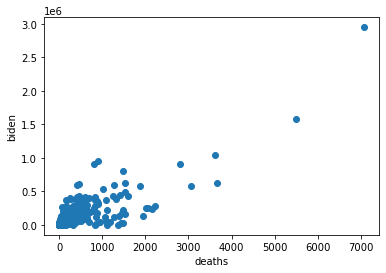

In [5]:
# identify relationships
plt.scatter(df.deaths, df.votes20_joe_biden)
plt.xlabel('deaths')
plt.ylabel('biden')
plt.show()

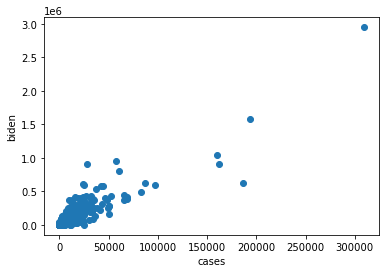

In [6]:
# identify relationships
plt.scatter(df.cases, df.votes20_joe_biden)
plt.xlabel('cases')
plt.ylabel('biden')
plt.show()

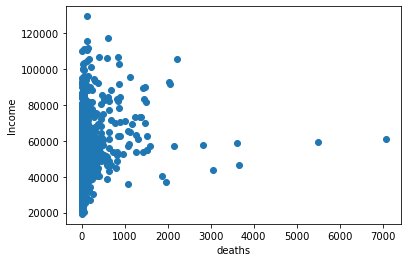

In [7]:
# identify relationships
plt.scatter(df.deaths, df.income)
plt.xlabel('deaths')
plt.ylabel('Income')
plt.show()

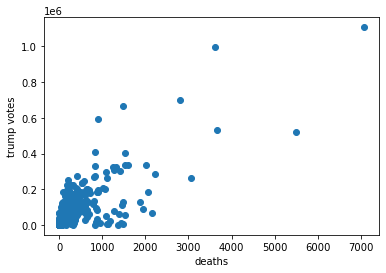

In [8]:
# identify relationships
plt.scatter(df.deaths, df.votes20_donald_trump)
plt.xlabel('deaths')
plt.ylabel('trump votes')
plt.show()

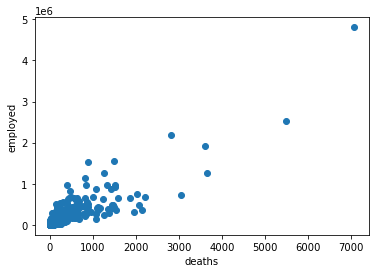

In [9]:
# identify relationships
plt.scatter(df.deaths, df.employed)
plt.xlabel('deaths')
plt.ylabel('employed')
plt.show()

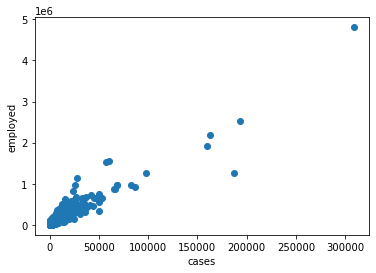

In [10]:
# identify relationships
plt.scatter(df.cases, df.employed)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

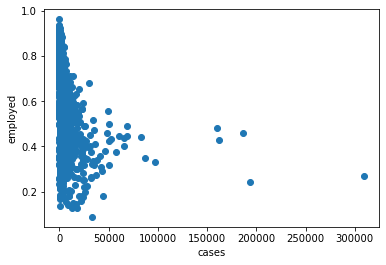

In [11]:
# identify relationships
plt.scatter(df.cases, df.percentage20_donald_trump)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

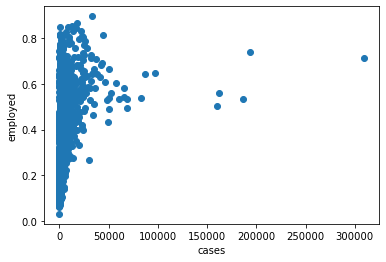

In [12]:
# identify relationships
plt.scatter(df.cases, df.percentage20_joe_biden)
plt.xlabel('cases')
plt.ylabel('employed')
plt.show()

In [14]:
## Although some data is clustered together, there does appear to be several linear
## relationships, which is enough to justify a linear regression model. Scaling/normalizing
## the data will need to be performed to 'uncluster' some data points